<a href="https://colab.research.google.com/github/AnnLivio/Cyclistic/blob/main/Cyclistic_Data_Clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CYCLISTIC · Data Cleaning


**Cyclistic** es un programa de bicicletas compartidas que incluye 5,800 bicicletas y más de 690 estaciones en Chicago. Se destaca por ofrecer también bicicletas reclinadas, triciclos manuales y bicicletas de carga que ofrecen un uso más inclusivo para los ciclistas que no pueden utilizar una bicicleta estándar.
Uno de los enfoques que ayudó a hacer esto posible fue la flexibilidad de sus planes de precios: `pases de un solo viaje`, `pases de un día completo` y `membresías anuales`. A los clientes que compran pases de un solo viaje o pases de un día completo se los llama ciclistas ocasionales. Los clientes con membresías anuales se llaman miembros de Cyclistic.

### Pregunta inicial:
¿En qué se diferencian los socios anuales y los ciclistas ocasionales con respecto al uso de las bicicletas de Cyclistic?



In [ ]:
#import libraries
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns


In [ ]:
#Load the first dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone/data/202310-divvy-tripdata.csv")
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member


In [ ]:
#Load the other months
# 1. Create list of file names
months_data = ['202311', '202312', '202401', '202402', '202403', '202404', '202405', '202406', '202407', '202408', '202409']

# 2. Use a for to create path and load each file
for i in months_data:
  path = "/content/drive/MyDrive/Colab Notebooks/Capstone/data/"+i+"-divvy-tripdata.csv"
  df_temp = pd.read_csv(path)

  # 3. Concatenate previous dataset with the new data
  df = pd.concat([df, df_temp])



In [ ]:
#Delete the temporal dataframes
del df_temp

#Get a first look
df.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5854544 entries, 0 to 5854543
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   index               int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    object 
 7   end_station_name    object 
 8   end_station_id      object 
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
dtypes: float64(4), int64(1), object(9)
memory usage: 625.3+ MB


### Missing data

In [ ]:
df.isna().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,1056535
start_station_id,1056535
end_station_name,1091792
end_station_id,1091792
start_lat,0
start_lng,0


In [ ]:
df[df['start_station_name'].isna()].head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
175287,04655B83C58A53CE,electric_bike,2023-10-24 21:28:31,2023-10-24 21:31:51,NaN,NaN,Wood St & Augusta Blvd,657,41.90,-87.67,41.899181,-87.672200,member
175288,998C7403C2F1230A,electric_bike,2023-10-19 17:44:44,2023-10-19 18:09:33,NaN,NaN,Public Rack - Milwaukee Ave & Pensacola Ave,1112.0,42.01,-87.77,41.959511,-87.753396,member
175289,B259B7A9BE948D4E,electric_bike,2023-10-26 12:34:58,2023-10-26 12:38:39,NaN,NaN,Sedgwick St & Schiller St,TA1307000143,41.90,-87.63,41.907626,-87.638566,member


In [ ]:
df[(df['end_station_name'].isna() & df['start_station_name'].isna())].info()

<class 'pandas.core.frame.DataFrame'>
Index: 521999 entries, 470189 to 820940
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             521999 non-null  object 
 1   rideable_type       521999 non-null  object 
 2   started_at          521999 non-null  object 
 3   ended_at            521999 non-null  object 
 4   start_station_name  0 non-null       object 
 5   start_station_id    0 non-null       object 
 6   end_station_name    0 non-null       object 
 7   end_station_id      0 non-null       object 
 8   start_lat           521999 non-null  float64
 9   start_lng           521999 non-null  float64
 10  end_lat             521999 non-null  float64
 11  end_lng             521999 non-null  float64
 12  member_casual       521999 non-null  object 
dtypes: float64(4), object(9)
memory usage: 55.8+ MB


## Valores duplicados

In [ ]:
#Check duplicated values
df[df.duplicated(subset=['ride_id'], keep=False)].sort_values(['ride_id', 'started_at']).tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
343335,FCA692A3455D0366,electric_bike,2024-05-31 23:56:30.372,2024-06-01 00:09:42.708,Fairbanks St & Superior St,18003,Leavitt St & Chicago Ave,18058,41.895464,-87.619711,41.895501,-87.682017,member
269789,FCAC6F8E18670115,electric_bike,2024-05-31 22:16:23,2024-06-01 00:36:54,Lincoln Ave & Melrose St,TA1309000042,NaN,NaN,41.940527,-87.669570,41.950000,-87.660000,casual
647916,FCAC6F8E18670115,electric_bike,2024-05-31 22:16:23.936,2024-06-01 00:36:54.772,Lincoln Ave & Melrose St,TA1309000042,NaN,NaN,41.940527,-87.669570,41.950000,-87.660000,casual
547210,FEA150E7A56F187E,classic_bike,2024-05-31 23:09:06,2024-06-01 08:47:44,Sangamon St & Lake St,TA1306000015,State St & Kinzie St,13050,41.885779,-87.651025,41.889375,-87.627077,member
18132,FEA150E7A56F187E,classic_bike,2024-05-31 23:09:06.280,2024-06-01 08:47:44.728,Sangamon St & Lake St,TA1306000015,State St & Kinzie St,13050,41.885779,-87.651025,41.889375,-87.627077,member


Los valores duplicados corresponden a registros `started_at` al final de un mes y `ended_at` al inicio del siguiente. Se pueden eliminar dejando el primer registro.

In [ ]:
#Drop duplicates and keep the first occurrence
df = df.drop_duplicates(subset=['ride_id'], keep='first')

## Converción de tipo de datos

In [ ]:
# Convert the `started_at` and `ended_at` column to datetime.
df['started_at'] = pd.to_datetime(df['started_at'], format='ISO8601')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='ISO8601')

## Nuevas columnas "ride_lenght" y "weekday"

In [ ]:
# Create a column `ride_lenght`
df['ride_lenght'] = (df['ended_at'] - df['started_at'])


In [ ]:
# Create column 'weekday'
df['weekday'] = df['started_at'].dt.day_name()

#Create list of weekday in order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert column 'weekday' in categorical with the specified order
df['weekday'] = pd.Categorical(df['weekday'], categories=weekday_order, ordered=True)


#Show the new column
df[['ride_id', 'started_at', 'ended_at', 'ride_lenght', 'weekday','member_casual']].head()


,ride_id,started_at,ended_at,ride_lenght,weekday,member_casual
0,4449097279F8BBE7,2023-10-08 10:36:26,2023-10-08 10:49:19,0 days 00:12:53,Sunday,member
1,9CF060543CA7B439,2023-10-11 17:23:59,2023-10-11 17:36:08,0 days 00:12:09,Wednesday,member
2,667F21F4D6BDE69C,2023-10-12 07:02:33,2023-10-12 07:06:53,0 days 00:04:20,Thursday,member
3,F92714CC6B019B96,2023-10-24 19:13:03,2023-10-24 19:18:29,0 days 00:05:26,Tuesday,member
4,5E34BA5DE945A9CC,2023-10-09 18:19:26,2023-10-09 18:30:56,0 days 00:11:30,Monday,member


In [ ]:
df['ride_lenght'].describe()

,ride_lenght
count,5854333
mean,0 days 00:17:17.585275483
std,0 days 01:04:02.479315424
min,-12 days +10:23:29
25%,0 days 00:05:31.767000
50%,0 days 00:09:40.786000
75%,0 days 00:17:10.450000
max,1 days 01:59:56


## Valores Irregulares en ride_lenght / Outliers

<Axes: xlabel='weekday', ylabel='ride_lenght'>

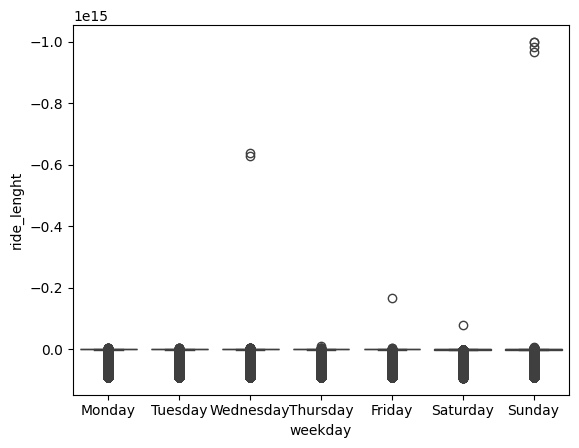

In [ ]:
sns.boxplot(x=df["weekday"],y=df["ride_lenght"])

Podemos observar valores negativos en `ride_lenght`, particularmente durante los domingos (sundays) y miércoles (wednesday).

In [ ]:
# Count negative values in ride_lenght per weekday
df[df['ride_lenght']< pd.Timedelta(seconds=0)].groupby('weekday', observed=False)['ride_id'].count()

,ride_id
weekday,
Monday,31
Tuesday,31
Wednesday,47
Thursday,41
Friday,27
Saturday,37
Sunday,80


In [ ]:
# Count total negative values in ride_lenght
df[df['ride_lenght']< pd.Timedelta(seconds=0)]['ride_id'].count()


294

In [ ]:
#Isolate negatives values at `ride_lenght`
negative_rides = df[df['ride_lenght']< pd.Timedelta(seconds=0)]

# Drop negative values from dataset
df = df.drop(negative_rides.index)

In [ ]:
df['ride_lenght'].describe()

,ride_lenght
count,5851552
mean,0 days 00:17:18.620788668
std,0 days 01:02:15.606838463
min,0 days 00:00:00
25%,0 days 00:05:31.858000
50%,0 days 00:09:40.862000
75%,0 days 00:17:10.530250
max,1 days 01:59:56


In [ ]:
# Save clean data
path = "/content/drive/MyDrive/Colab Notebooks/Capstone/data/cyclistic_clean_data.csv"
df.to_csv(path, index=False)

## Anotaciones y documentación

+ Los datos son íntegros de primera mano.

1. Chequeamos los valores nulos (Null/NaN), no ha sido necesario eliminarlos para el análisis correspondiente ya que corresponden a datos relativos a las estaciones de inicio y fin de viaje.
2. Comprobamos la existencia de datos duplicados y los hemos eliminado al tratarse dejando la primera aparición. El duplicado se debe a que son viajes con un inicio a última hora de un mes y finalización sobre la primera hora del mes siguiente.
3. Convertimos las columnas `started_at` y `ended_at` de tipo "object" a "date" para poder procesarlas debidamente.
4. Creamos una columna `ride_lenght` para registrar la duración de cada viaje en unidad de tiempo; y una columna `weekday` para poder registrar tendencias los días de la semana.
5. Encontramos y analizamos valores atípicos en `ride_lenght`, al tratarse de valores negativos los hemos separado del dataset original para posterior consulta.
6. Guardamos los datos limpios para continuar con el análisis. Nombre de archivo: `cyclistic_clean_data.csv`.



Octubre 2024